## Cafelura análise de vendas

In [3]:
import pandas as pd
import seaborn as sns
cafelura = pd.read_csv('cafelura.csv')
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [4]:
print('Quantidade de linhas e colunas: ', cafelura.shape)
print('Quantidade de dados nulos: ', cafelura.isna().sum().sum())

Quantidade de linhas e colunas:  (24, 2)
Quantidade de dados nulos:  0


In [5]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax

C:\Users\Saulo\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


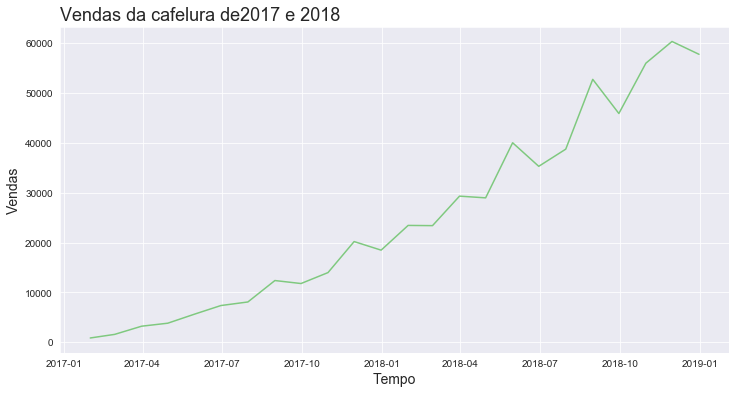

In [6]:
plotar('Vendas da cafelura de2017 e 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

In [7]:
dias_de_fds = pd.read_csv('dias_final_de_semana.csv')
dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [8]:
dias_de_fds.quantidade_de_dias.values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [9]:
cafelura['vendas_normalizadas'] = cafelura['vendas']/dias_de_fds.quantidade_de_dias.values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


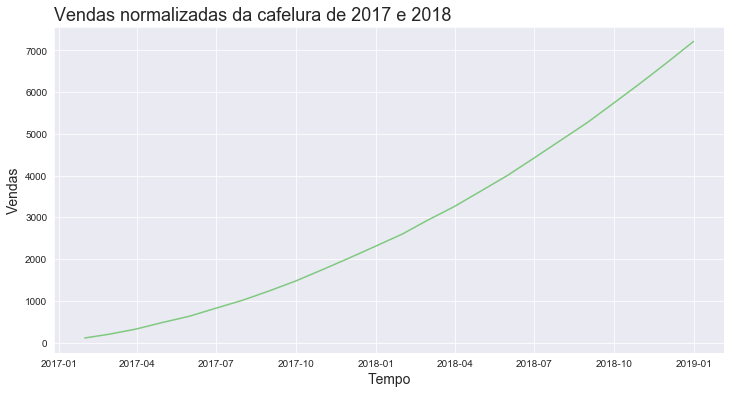

In [10]:
plotar('Vendas normalizadas da cafelura de 2017 e 2018', 'Tempo', 'Vendas', 'mes', 'vendas_normalizadas', cafelura)

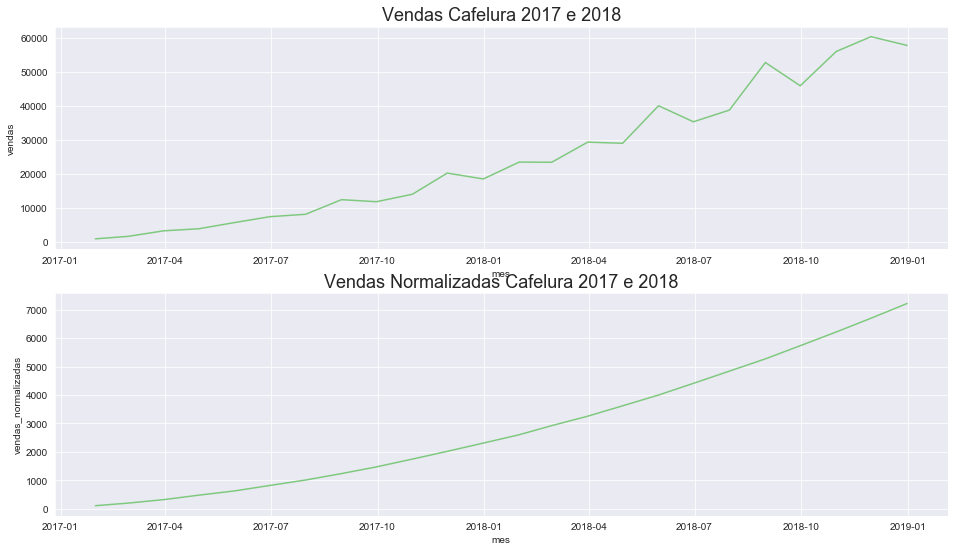

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
ax=plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax=plt.subplot(2,1,2)
ax.set_title('Vendas Normalizadas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax=ax

## Normalização  

Divide os dados pelos dias de fim de semana, mas explica meio mal o porquê de ter feito isso...

# Statsmodels

In [19]:
chocolura = pd.read_csv('chocolura.csv')
chocolura['mes'] = pd.to_datetime(chocolura.mes)

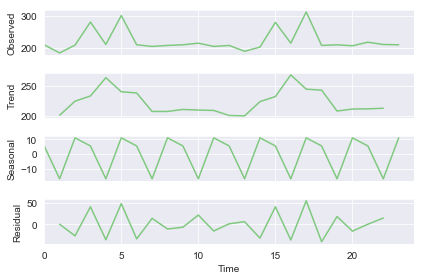

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

resultados = seasonal_decompose([chocolura['vendas']], freq=3) ### Porquê essa diferença com as frequências? custava explicar??
ax=resultados.plot()

In [30]:
observacao = resultados.observed
tendencia = resultados.trend
sazonalidade = resultados.seasonal
ruido = resultados.resid

In [31]:
data = ({
    'observacao': observacao,
    'tendencia': tendencia,
    'sazonalidade': sazonalidade,
    'ruido': ruido
})

resultado = pd.DataFrame(data)